In [10]:
import numpy as np

import os, imp

import matplotlib.pyplot as plt

from PIL import Image

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)

%matplotlib inline

In [4]:
# Get the path to the lego directory
_package_path = '/home/sean/Insight/legos/'

# Load the image processing library
_ip_subpkg = 'image_processing'
_ip_module = 'image_processing.py'
ip         = imp.load_source(_ip_subpkg, _package_path+_ip_subpkg+'/'+_ip_module)

In [8]:
lego_dir = '/home/sean/Desktop/lego_images_bounding_raw/'

lego_file_list = os.listdir( lego_dir )

In [34]:
n_images = 3

min_false_image_mult = 4
max_false_image_mult = 10

min_false_image_resize = 0.5
max_false_image_resize = 2.0

In [125]:
import random
import numpy     as np
import PIL.Image as Image
import matplotlib.patches as patches

def get_avg_background_color( inp_arr ):
    return ( 
                inp_arr[  0 ,  0 ] +  
                inp_arr[  0 , -1 ] +  
                inp_arr[ -1 ,  0 ] +  
                inp_arr[ -1 , -1 ] 
           ) / 4.

def get_pil_img_arr( img ):
    image_arr = np.array( img.getdata() )
    r_vals = image_arr[:,0].reshape( img.size[::-1] )
    g_vals = image_arr[:,1].reshape( img.size[::-1] )
    b_vals = image_arr[:,2].reshape( img.size[::-1] )
    return np.array( [r_vals,g_vals,b_vals] )

out_img_counter = 0
out_box_list = {}

Below here, begin creating false images

In [12]:
lego_file_name = lego_dir + lego_file_list[0]

lego_image_base = Image.open( lego_file_name )

Now, need to get background color

In [99]:
lego_image_base_arr = get_pil_img_arr( lego_image_base )

r_vals = lego_image_base_arr[0]
g_vals = lego_image_base_arr[1]
b_vals = lego_image_base_arr[2]

avg_background_r = get_avg_background_color( r_vals )
avg_background_g = get_avg_background_color( g_vals )
avg_background_b = get_avg_background_color( b_vals )

avg_background_color = [
                           int( avg_background_r ),
                           int( avg_background_g ),
                           int( avg_background_b ),
                       ]

image_rgb_arr = np.array( [ r_vals, g_vals, b_vals ] )

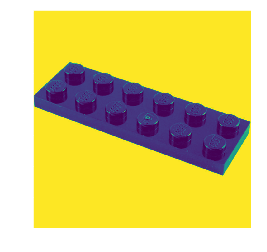

1 3


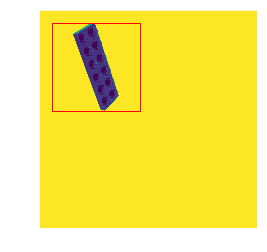

0 0


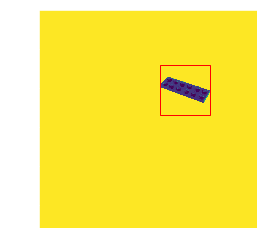

0 0


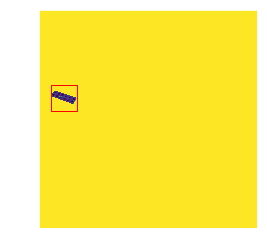

In [137]:
plt.imshow( image_rgb_arr[0] )
plt.show()


# Loop over number of reproduced images we will make
for false_image_i in range( 0 , n_images ):
    
    # Whether or not we will flip the image
    rand_flip = random.randint( 0, 1 )
    
    # Rotation, 0 0deg, 1 90deg, 2 180deg, 3 270deg
    rand_rot  = random.randint( 0, 3 )
    
    # Generate random size of new image, will flip if rand_flip==1
    rand_size = random.randint( 
                                min_false_image_mult , 
                                max_false_image_mult 
                              ) * np.array( r_vals.shape )
    
    # Get amount we will resize by
    rand_resize = random.uniform( 
                                    min_false_image_resize , 
                                    max_false_image_resize , 
                                )
    
    
    # Resized 
    resize_size = rand_resize * np.array( lego_image_base.size )
    resize_size = [ int( resize_size[0] ) , int( resize_size[1]) ]
    
    
    
    
    # Copy original image, but resize it for variation
    inset_img = lego_image_base.resize( resize_size, Image.ANTIALIAS )    
    inset_arr = get_pil_img_arr( inset_img )
    
    # Flip the image across h axis
    if ( rand_flip ):
        new_arr = inset_arr.copy()
        
        for i in range( 0 , 3 ):
            new_arr[i,:,:] = ip.h_flip_array( inset_arr[i] )
        inset_arr = new_arr.copy()
    
    
    # Rotate the image
    new_arr = inset_arr.copy()
    for i in range( 0 , 3 ):
            new_arr[i,:,:] = np.rot90( inset_arr[i], rand_rot )
    inset_arr = new_arr.copy()
    
    # 90 or 270 need to flip rand_size as well
    if ( rand_rot % 2 == 1 ):
        rand_size = rand_size[::-1]
    
    
    
    
    # Generate the false image
    false_image = np.ones( [3,rand_size[0],rand_size[1]], dtype=int )    
    for i in range( 0 , 3 ):
        false_image[i] = false_image[i] * avg_background_color[i]

    
    # Get new coordinates
    min_x = random.randint( 0, false_image.shape[1]-inset_arr.shape[1] - 2 )
    max_x = min_x + inset_arr.shape[1]
    min_y = random.randint( 0, false_image.shape[2]-inset_arr.shape[2] - 2 )
    max_y = min_y + inset_arr.shape[2]

    
    for i in range( 0, 3 ):
        false_image[
                    i,
                    min_x:max_x,
                    min_y:max_y
                   ] = inset_arr[i]

    fig, ax = plt.subplots(1)
    rect = patches.Rectangle((min_y,min_x),max_x-min_x,max_y-min_y,linewidth=1,edgecolor='r',facecolor='none')

    
    out_box_list[str(big_counter)] = [min_x,min_y,max_x,max_y]
    big_counter = big_counter + 1
    
    # Add the patch to the Axes
    ax.add_patch(rect)

    ax.imshow( false_image[0] )
    print rand_flip, rand_rot
    plt.show()
#    print false_image.shape[1]-inset_arr.shape[1] - 2
#    print false_image.shape[2]-inset_arr.shape[2] - 2
#    print false_image.shape, inset_arr.shape
#    print min_x, max_x
#    print min_y, max_y
#    print false_image[i]
    
    # Resize
    
#    print rand_flip
#    print rand_rot
#    plt.imshow( image_rgb_arr[0] )
#    plt.show()
#    plt.imshow( new_arr[0] )
#    plt.show()

# need embed

In [138]:
false_image

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]])

In [154]:
bar = np.swapaxes( false_image, 0, 2 )##np.zeros( [false_image.shape[2],false_image.shape[1],false_image.shape[0]] )
#for         i in range( 0 , false_image.shape[2] ):
#    for     j in range( 0 , false_image.shape[1] ):
#        for k in range ( 0 , false_image.shape[0] ):
#            bar[i,j,k] = false_image[k,j,i]

foo = Image.fromarray( bar.astype('uint8'), 'RGB' )

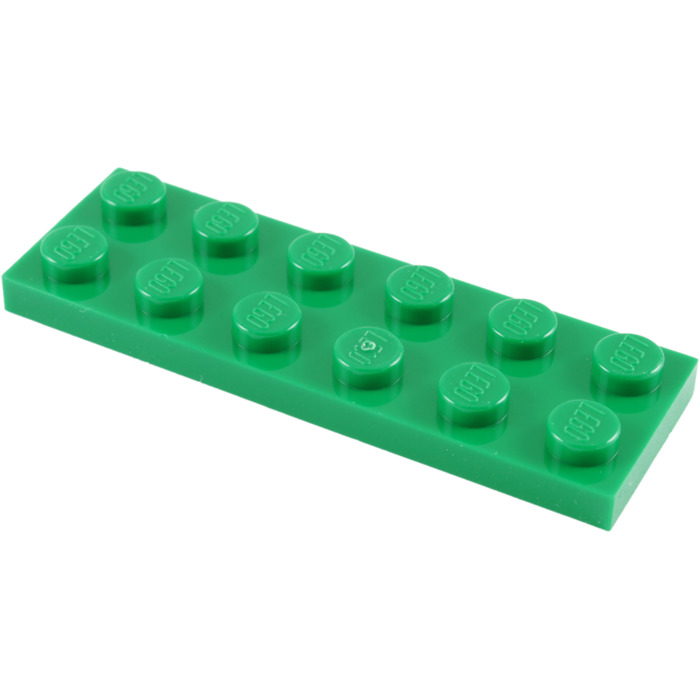

In [157]:
lego_image_base

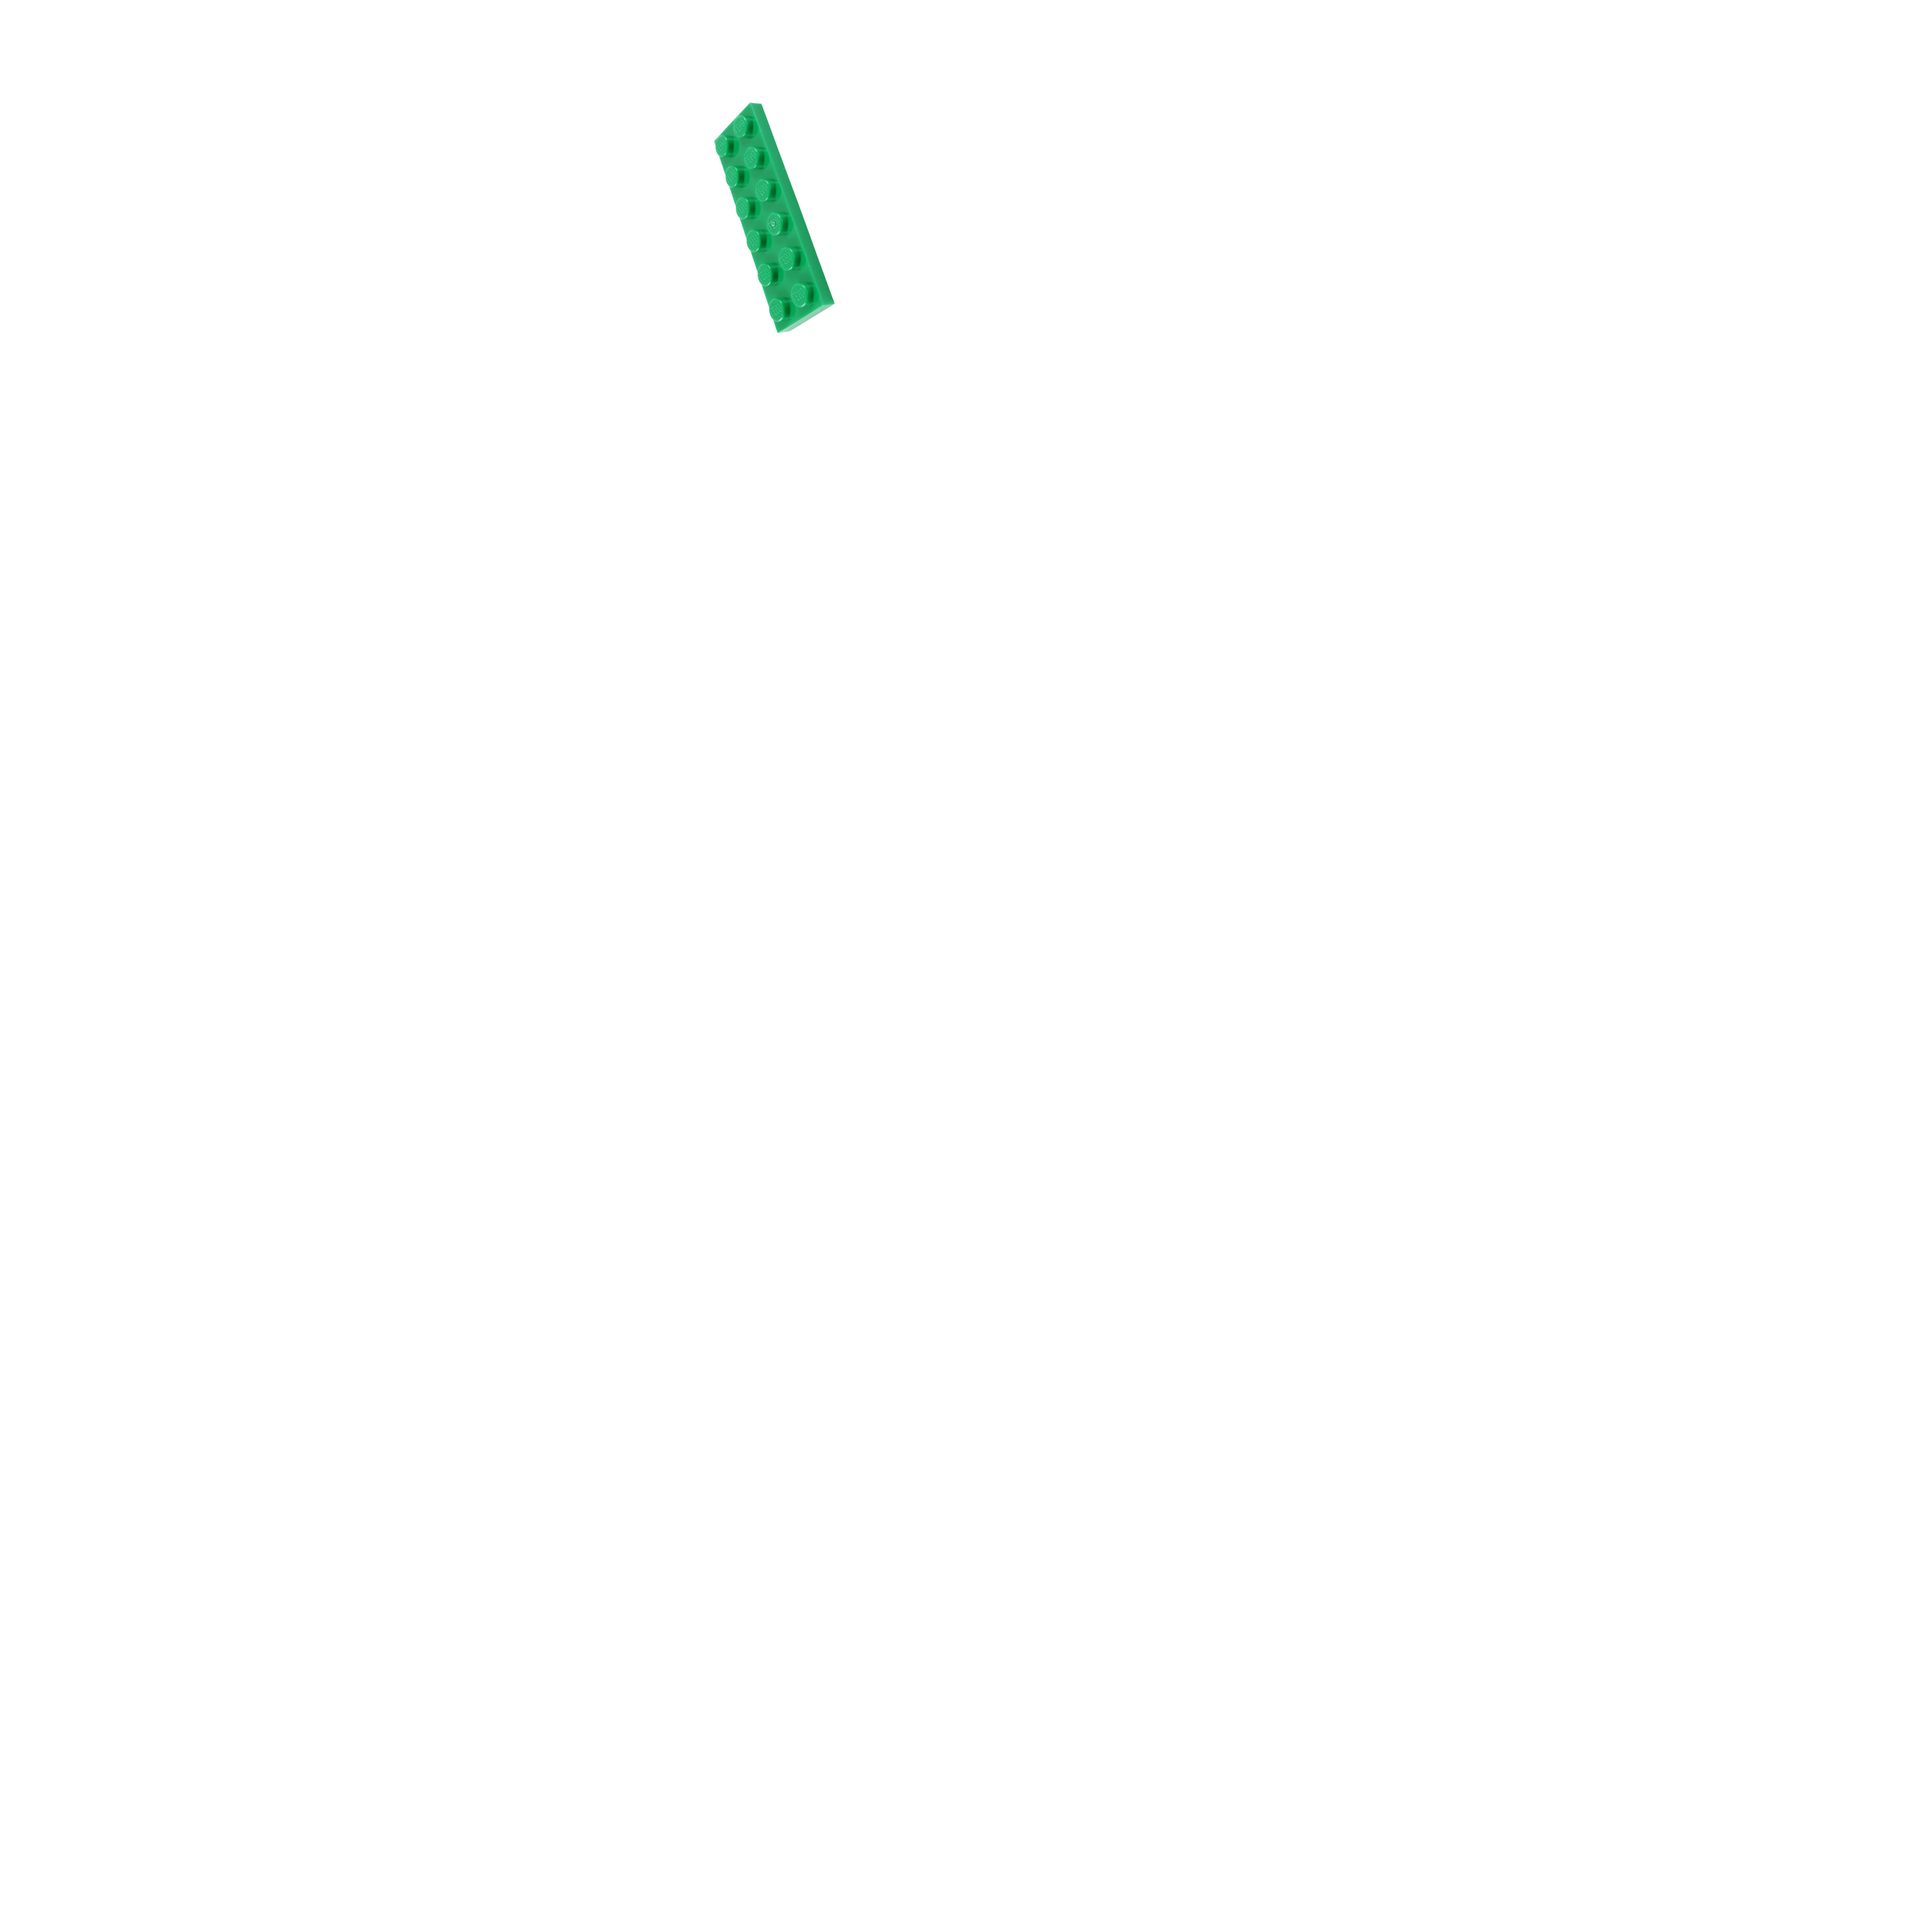

In [155]:
foo

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]])

In [1]:
import random
import numpy     as np
import PIL.Image as Image
import matplotlib.patches as patches
import numpy as np

import os, imp

import matplotlib.pyplot as plt

from PIL import Image

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)

%matplotlib inline


# Get the path to the lego directory
_package_path = '/home/sean/Insight/legos/'

# Load the image processing library
_ip_subpkg = 'image_processing'
_ip_module = 'image_processing.py'
ip         = imp.load_source(_ip_subpkg, _package_path+_ip_subpkg+'/'+_ip_module)


lego_dir = '/home/sean/Desktop/lego_images_bounding_raw/'

lego_file_list = os.listdir( lego_dir )


# CHANGE THESE
n_images = 5

min_false_image_mult = 4
max_false_image_mult = 6

min_false_image_resize = 0.25
max_false_image_resize = 2.0

out_dir = '/home/sean/Desktop/lego_images_bounding_box/'



def get_avg_background_color( inp_arr ):
    return ( 
                inp_arr[  0 ,  0 ] +  
                inp_arr[  0 , -1 ] +  
                inp_arr[ -1 ,  0 ] +  
                inp_arr[ -1 , -1 ] 
           ) / 4.

def get_pil_img_arr( img ):
    image_arr = np.array( img.getdata() )
    r_vals = image_arr[:,0].reshape( img.size[::-1] )
    g_vals = image_arr[:,1].reshape( img.size[::-1] )
    b_vals = image_arr[:,2].reshape( img.size[::-1] )
    return np.array( [r_vals,g_vals,b_vals] )

out_img_counter = 0
out_box_list = {}
big_counter  = 0

for lego_file in lego_file_list:
    try:
        lego_file_name = lego_dir + lego_file
        lego_image_base = Image.open( lego_file_name )

        lego_image_base_arr = get_pil_img_arr( lego_image_base )

        r_vals = lego_image_base_arr[0]
        g_vals = lego_image_base_arr[1]
        b_vals = lego_image_base_arr[2]

        avg_background_r = get_avg_background_color( r_vals )
        avg_background_g = get_avg_background_color( g_vals )
        avg_background_b = get_avg_background_color( b_vals )

        avg_background_color = [
                                   int( avg_background_r ),
                                   int( avg_background_g ),
                                   int( avg_background_b ),
                               ]

        image_rgb_arr = np.array( [ r_vals, g_vals, b_vals ] )

        # Loop over number of reproduced images we will make
        for false_image_i in range( 0 , n_images ):
            # Whether or not we will flip the image
            rand_flip = random.randint( 0, 1 )

            # Rotation, 0 0deg, 1 90deg, 2 180deg, 3 270deg
            rand_rot  = random.randint( 0, 3 )

            # Generate random size of new image, will flip if rand_flip==1
            rand_size = random.randint( 
                                        min_false_image_mult , 
                                        max_false_image_mult 
                                      ) * np.array( r_vals.shape )

            # Get amount we will resize by
            rand_resize = random.uniform( 
                                            min_false_image_resize , 
                                            max_false_image_resize , 
                                        )


            # Resized 
            resize_size = rand_resize * np.array( lego_image_base.size )
            resize_size = [ int( resize_size[0] ) , int( resize_size[1]) ]




            # Copy original image, but resize it for variation
            inset_img = lego_image_base.resize( resize_size, Image.ANTIALIAS )    
            inset_arr = get_pil_img_arr( inset_img )

            # Flip the image across h axis
            if ( rand_flip ):
                new_arr = inset_arr.copy()

                for i in range( 0 , 3 ):
                    new_arr[i,:,:] = ip.h_flip_array( inset_arr[i] )
                inset_arr = new_arr.copy()


            # Rotate the image
            new_arr = inset_arr.copy()
            for i in range( 0 , 3 ):
                    new_arr[i,:,:] = np.rot90( inset_arr[i], rand_rot )
            inset_arr = new_arr.copy()

            # 90 or 270 need to flip rand_size as well
            if ( rand_rot % 2 == 1 ):
                rand_size = rand_size[::-1]




            # Generate the false image
            false_image = np.ones( [3,rand_size[0],rand_size[1]], dtype=int )    
            for i in range( 0 , 3 ):
                false_image[i] = false_image[i] * avg_background_color[i]


            # Get new coordinates
            min_x = random.randint( 0, false_image.shape[1]-inset_arr.shape[1] - 2 )
            max_x = min_x + inset_arr.shape[1]
            min_y = random.randint( 0, false_image.shape[2]-inset_arr.shape[2] - 2 )
            max_y = min_y + inset_arr.shape[2]

            # Embed image
            for i in range( 0, 3 ):
                false_image[
                            i,
                            min_x:max_x,
                            min_y:max_y
                           ] = inset_arr[i]


            # Swap axes so it will convert right
            bar = np.swapaxes( false_image, 0, 2 )
            out_file = Image.fromarray( bar.astype('uint8'), 'RGB' )

            # Save the image, and the output dict
            out_path = out_dir+ str(big_counter) + '.jpg'
            out_box_list['bounds'+str(big_counter)] = [min_x,min_y,max_x,max_y]
            out_box_list['file'+str(big_counter)  ] = out_path     

            out_file.save( out_path )
            big_counter = big_counter + 1
        print 'Successfully wrote files for '+lego_file
    except:
        print 'Unable to work with '+lego_file
            
with open('output_info.txt','w') as f:
    for i in range( 0, big_counter ):
        try:
            out_file = out_box_list['file'+str(i)]
            out_bound= out_box_list['bounds'+str(i)]
            f.write('\''+out_file+'\','+str(out_bound)+',\'lego\'\n')
        except:
            pass

Successfully wrote files for 1. lego-green-plate-2-x-6-3795-30-735504-61.jpg
Successfully wrote files for 1. lego-technic-brick-1-x-2-with-hole-3700-30.jpg
Unable to work with 5. 5274845.jpg
Unable to work with 14. lego-transparent-plate-2-x-3-3021-2-960521-97.jpg
Unable to work with 15. 2456_5_lg.png
Successfully wrote files for 28. 2x4-lego-brick.jpg
Unable to work with 37. 2357_24_lg.png
Successfully wrote files for 36. 6135412.jpg
Successfully wrote files for 3. 4550701-large.jpg
Successfully wrote files for 19. lego-spare-parts-brick-1x8-lbg.jpg
Unable to work with 40. lego-4211008-4162-1x-dark-blueish-grey-dark-stone-dark-standard-grey-1x8-flat-tile_1.jpg
Unable to work with 10. 92947.png
Unable to work with 8. d97a350bf0d23d77061416064bd3cafd.jpg
Unable to work with 25. 61uspcumxhl._sl1500_.jpg
Successfully wrote files for 19. 21zyohfelkl._sl500_ac_ss350_.jpg
Successfully wrote files for 50. 4501225.jpg
Unable to work with 4. 10-20122010-071791l.gif
Successfully wrote files for 